# 1. Inference

`polygon_detect.py` runs polygon-enabled YOLOv5 inference on a variety of sources, and saving results to `runs/detect`.

Notice: polygon_detect.py is designed for polygon cases
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.75, device='', exist_ok=False, half=False, hide_conf=False, hide_labels=True, imgsz=1024, iou_thres=0.4, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='data/images/UCAS-AOD', update=False, view_img=False, weights=['polygon-yolov5s-ucas.pt'])
YOLOv5 🚀 v5.0-174-g4695ca8 torch 1.9.0+cu102 CUDA:0 (NVIDIA Tesla K80, 11441.1875MB)

Fusing layers... 
/home/xinzeli831/miniconda3/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary

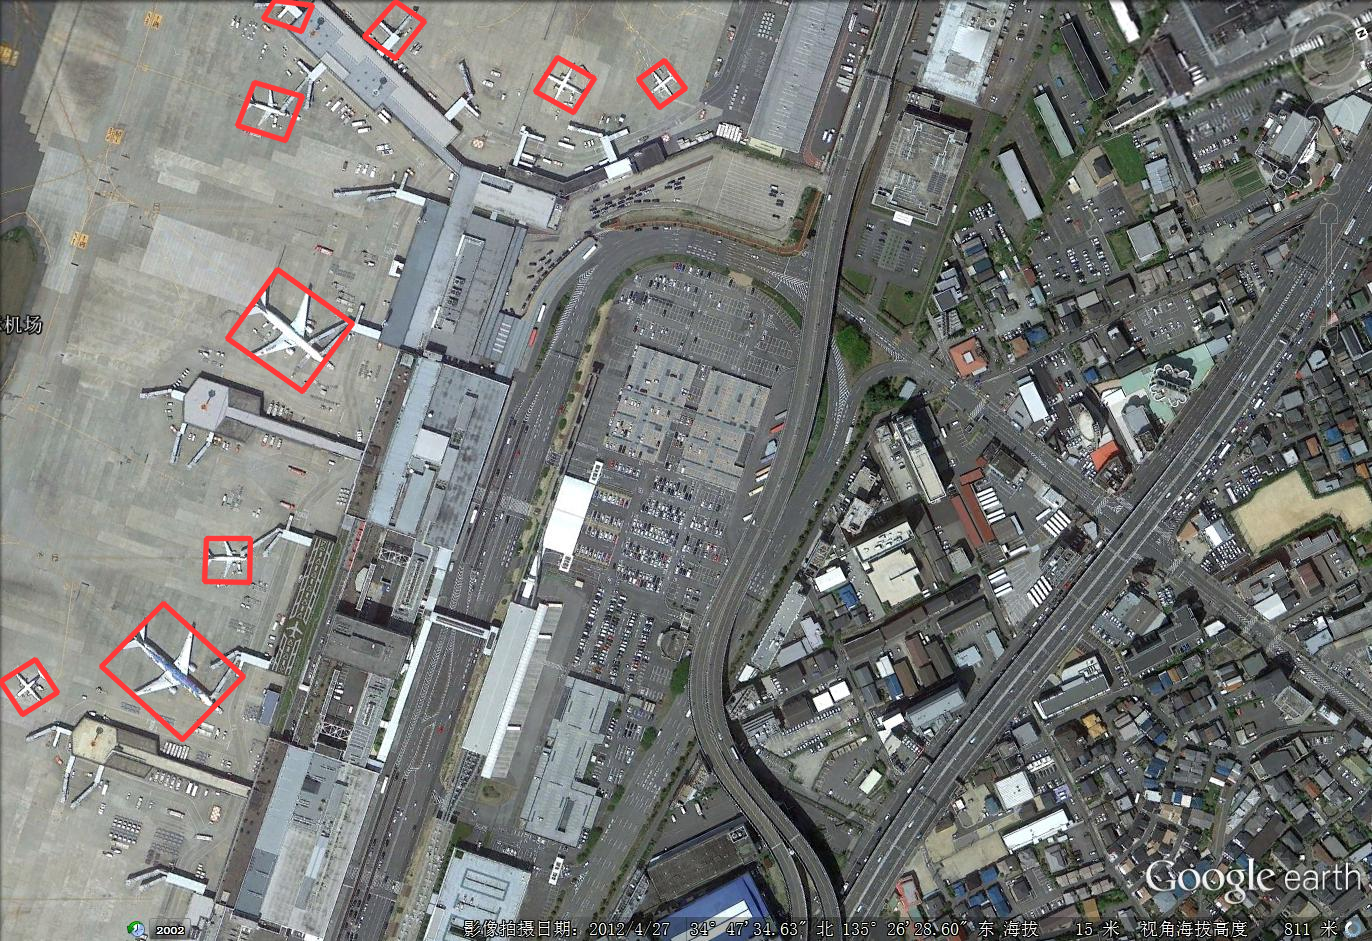

In [1]:
from IPython.display import Image

!python polygon_detect.py --weights polygon-yolov5s-ucas.pt --img 1024 --conf 0.75 \
    --source data/images/UCAS-AOD --iou-thres 0.4 --hide-labels
Image(filename='runs/detect/exp/1070.png', width=1024)

# 2. Test
Test the polygon model's accuracy on [UCAS-AOD] dataset (https://hyper.ai/datasets/5419). To show results by class use the `--verbose` flag.

## UCAS-AOD
Download [UCAS-AOD val](my link) dataset (GB - 191 images), and test model accuracy.

In [ ]:
# Download UCAS-AOD for polygon anchor boxes
# torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/coco2017val.zip', 'tmp.zip')
# !unzip -q tmp.zip -d ../ && rm tmp.zip

In [2]:
# Run Polygon_Yolov5s on UCAS-AOD
!python polygon_test.py --weights polygon-yolov5s-ucas.pt --data polygon_ucas.yaml --img 1024 --iou 0.65 --task val

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./data/polygon_ucas.yaml', device='', exist_ok=False, half=False, imgsz=1024, iou_thres=0.65, name='exp', project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['polygon-yolov5s-ucas.pt'])
YOLOv5 🚀 v5.0-174-g4695ca8 torch 1.9.0+cu102 CUDA:0 (NVIDIA Tesla K80, 11441.1875MB)

Fusing layers... 
/home/xinzeli831/miniconda3/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 224 layers, 7067395 parameters, 0 gradients, 16.4 GFLOPs
val: Scanning '../UCAS50/val.cache' images and labels... 10 f

# 3. Train

Download [UCAS-AOD](my link), train polygon-YOLOv5s from a pretrained checkpoint for 3 epochs (note actual training is typically much longer, around **300-1000 epochs**, depending on your dataset).

In [ ]:
# # Download COCO128
# torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip', 'tmp.zip')
# !unzip -q tmp.zip -d ../ && rm tmp.zip

Train a polygon-YOLOv5s model on [UCAS-AOD train](my link) with `--data polygon_ucas.yaml`, starting from pretrained `--weights polygon-yolov5s-ucas.pt`, or from randomly initialized `--weights '' --cfg polygon_yolov5s_ucas`.

All training results are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.


In [ ]:
# Tensorboard  (optional)
%load_ext tensorboard
%tensorboard --logdir runs/train

In [ ]:
# Weights & Biases  (optional)
%pip install -q wandb
import wandb
wandb.login()

## 3.1 Autoanchor
* Run utils.polygon_kmean_anchors to generate **predefined anchors** for your specific datasets with specified image size.
* Notice: For polygon anchor boxes, **minimum outter bounding box** of polygon is used in the kmeans anchor selection.

In [3]:
from utils.autoanchor import polygon_kmean_anchors

nl = 3 # number of anchor layers
na = 3 # number of anchors
img_size = 1024 # image size for training and testing

datacfg = "data/polygon_ucas.yaml"
anchors = polygon_kmean_anchors(datacfg, n=nl*na, gen=3000, img_size=img_size)
print(anchors.reshape(nl, na*2).astype(int))
print('\nPlease Copy the anchors to your model configuration polygon_yolov5*.yaml')

Scanning '../UCAS50/train' images and labels...40 found, 0 missing, 0 empty, 1 corrupted: 100%|██████████| 40/40 [00:00<00:00, 850.52it/s]
autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.8617:   8%|▊         | 227/3000 [00:00<00:01, 2226.14it/s]

autoanchor: Running kmeans for 9 anchors on 363 points...
autoanchor: thr=0.25: 1.0000 best possible recall, 7.98 anchors past thr
autoanchor: n=9, img_size=1024, metric_all=0.513/0.860-mean/best, past_thr=0.553-mean: 27,36,  43,25,  32,51,  55,41,  60,59,  82,77,  95,95,  113,112,  136,137
autoanchor: thr=0.25: 1.0000 best possible recall, 7.99 anchors past thr
autoanchor: n=9, img_size=1024, metric_all=0.514/0.861-mean/best, past_thr=0.553-mean: 27,36,  43,25,  32,50,  54,41,  60,60,  80,77,  95,96,  114,112,  135,137
autoanchor: thr=0.25: 1.0000 best possible recall, 7.98 anchors past thr
autoanchor: n=9, img_size=1024, metric_all=0.514/0.861-mean/best, past_thr=0.553-mean: 27,36,  43,25,  32,49,  54,41,  60,60,  80,77,  95,96,  114,112,  135,137
autoanchor: thr=0.25: 1.0000 best possible recall, 7.97 anchors past thr
autoanchor: n=9, img_size=1024, metric_all=0.514/0.862-mean/best, past_thr=0.554-mean: 28,35,  43,25,  32,48,  53,41,  60,60,  80,77,  96,95,  116,110,  138,139
autoan

autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.8634:  20%|██        | 600/3000 [00:00<00:01, 2018.63it/s]

autoanchor: thr=0.25: 1.0000 best possible recall, 7.97 anchors past thr
autoanchor: n=9, img_size=1024, metric_all=0.514/0.863-mean/best, past_thr=0.555-mean: 28,34,  44,25,  31,49,  51,42,  59,59,  79,78,  96,96,  114,114,  138,134
autoanchor: thr=0.25: 1.0000 best possible recall, 7.97 anchors past thr
autoanchor: n=9, img_size=1024, metric_all=0.514/0.863-mean/best, past_thr=0.555-mean: 28,34,  44,25,  31,49,  51,42,  59,59,  79,78,  96,96,  114,114,  138,134
autoanchor: thr=0.25: 1.0000 best possible recall, 7.97 anchors past thr
autoanchor: n=9, img_size=1024, metric_all=0.515/0.863-mean/best, past_thr=0.555-mean: 28,34,  44,25,  32,49,  51,42,  59,59,  79,78,  97,95,  114,114,  138,135
autoanchor: thr=0.25: 1.0000 best possible recall, 7.97 anchors past thr
autoanchor: n=9, img_size=1024, metric_all=0.515/0.863-mean/best, past_thr=0.555-mean: 28,34,  44,25,  31,49,  51,42,  59,59,  79,78,  96,95,  114,113,  139,136
autoanchor: thr=0.25: 1.0000 best possible recall, 8.00 anchors 

autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.8640:  35%|███▌      | 1051/3000 [00:00<00:00, 2137.28it/s]

autoanchor: thr=0.25: 1.0000 best possible recall, 7.99 anchors past thr
autoanchor: n=9, img_size=1024, metric_all=0.517/0.864-mean/best, past_thr=0.557-mean: 29,33,  44,25,  31,49,  49,42,  58,58,  79,77,  95,96,  114,113,  138,138
autoanchor: thr=0.25: 1.0000 best possible recall, 8.00 anchors past thr
autoanchor: n=9, img_size=1024, metric_all=0.518/0.864-mean/best, past_thr=0.558-mean: 29,33,  44,25,  31,48,  49,42,  58,58,  79,77,  95,96,  112,112,  138,137
autoanchor: thr=0.25: 1.0000 best possible recall, 7.99 anchors past thr
autoanchor: n=9, img_size=1024, metric_all=0.518/0.864-mean/best, past_thr=0.558-mean: 29,33,  44,25,  31,48,  49,42,  58,58,  79,77,  95,96,  112,112,  138,137
autoanchor: thr=0.25: 1.0000 best possible recall, 7.99 anchors past thr
autoanchor: n=9, img_size=1024, metric_all=0.518/0.864-mean/best, past_thr=0.558-mean: 29,33,  44,25,  31,48,  49,42,  58,58,  79,78,  95,95,  112,112,  138,137
autoanchor: thr=0.25: 1.0000 best possible recall, 7.99 anchors 

autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.8642:  51%|█████     | 1537/3000 [00:00<00:00, 2282.54it/s]

autoanchor: thr=0.25: 1.0000 best possible recall, 7.99 anchors past thr
autoanchor: n=9, img_size=1024, metric_all=0.517/0.864-mean/best, past_thr=0.557-mean: 28,33,  44,25,  31,48,  50,42,  58,58,  79,78,  95,96,  112,111,  137,136
autoanchor: thr=0.25: 1.0000 best possible recall, 7.99 anchors past thr
autoanchor: n=9, img_size=1024, metric_all=0.517/0.864-mean/best, past_thr=0.557-mean: 28,33,  44,25,  31,48,  50,42,  58,58,  79,78,  96,96,  112,111,  137,136
autoanchor: thr=0.25: 1.0000 best possible recall, 7.99 anchors past thr
autoanchor: n=9, img_size=1024, metric_all=0.517/0.864-mean/best, past_thr=0.557-mean: 28,33,  44,25,  31,48,  50,42,  58,58,  79,78,  96,96,  112,111,  137,136
autoanchor: thr=0.25: 1.0000 best possible recall, 8.00 anchors past thr
autoanchor: n=9, img_size=1024, metric_all=0.517/0.864-mean/best, past_thr=0.556-mean: 28,33,  44,25,  30,48,  50,43,  58,58,  78,78,  96,96,  112,111,  137,136
autoanchor: thr=0.25: 1.0000 best possible recall, 7.99 anchors 

autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.8644:  76%|███████▌  | 2266/3000 [00:01<00:00, 2388.06it/s]

autoanchor: thr=0.25: 1.0000 best possible recall, 7.99 anchors past thr
autoanchor: n=9, img_size=1024, metric_all=0.517/0.864-mean/best, past_thr=0.557-mean: 28,33,  44,25,  30,48,  50,43,  58,58,  78,78,  96,96,  112,111,  137,136
autoanchor: thr=0.25: 1.0000 best possible recall, 8.01 anchors past thr
autoanchor: n=9, img_size=1024, metric_all=0.518/0.864-mean/best, past_thr=0.557-mean: 29,33,  43,25,  30,48,  49,43,  58,58,  79,77,  95,95,  112,110,  137,136
autoanchor: thr=0.25: 1.0000 best possible recall, 8.01 anchors past thr
autoanchor: n=9, img_size=1024, metric_all=0.518/0.864-mean/best, past_thr=0.557-mean: 29,33,  43,25,  30,48,  49,43,  58,58,  79,77,  95,95,  111,110,  137,136
autoanchor: thr=0.25: 1.0000 best possible recall, 8.01 anchors past thr
autoanchor: n=9, img_size=1024, metric_all=0.518/0.864-mean/best, past_thr=0.557-mean: 29,33,  43,25,  30,48,  49,43,  58,58,  79,77,  95,95,  111,110,  137,136
autoanchor: thr=0.25: 1.0000 best possible recall, 8.01 anchors 

autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.8644:  92%|█████████▏| 2770/3000 [00:01<00:00, 2444.45it/s]

autoanchor: n=9, img_size=1024, metric_all=0.518/0.864-mean/best, past_thr=0.557-mean: 29,33,  43,25,  30,48,  49,43,  58,58,  79,77,  95,95,  111,110,  137,136
autoanchor: thr=0.25: 1.0000 best possible recall, 8.00 anchors past thr
autoanchor: n=9, img_size=1024, metric_all=0.518/0.864-mean/best, past_thr=0.557-mean: 29,33,  43,25,  30,48,  50,43,  58,58,  79,77,  95,95,  111,110,  137,136
autoanchor: thr=0.25: 1.0000 best possible recall, 8.00 anchors past thr
autoanchor: n=9, img_size=1024, metric_all=0.518/0.864-mean/best, past_thr=0.557-mean: 29,33,  43,25,  30,48,  50,43,  58,58,  79,77,  95,95,  111,110,  137,136


autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.8644: 100%|██████████| 3000/3000 [00:01<00:00, 2319.47it/s]

autoanchor: thr=0.25: 1.0000 best possible recall, 8.00 anchors past thr
autoanchor: n=9, img_size=1024, metric_all=0.518/0.864-mean/best, past_thr=0.557-mean: 29,33,  43,25,  30,48,  50,43,  58,58,  79,77,  95,95,  111,110,  137,136
[[ 28  33  43  24  30  47]
 [ 49  42  58  58  78  77]
 [ 94  94 111 110 136 136]]

Please Copy the anchors to your model configuration polygon_yolov5*.yaml


## 3.2 Polygon Dataset with Augmentations
The following augmentation effects for polygon are shown. For details, please view ***datasets.py polygon_random_perspective, Polygon_LoadImagesAndLabels, polygon_load_mosaic***
<br> Notice: for the exemplar training on UCAS-AOD, the mosaic and mixup are not used.
* image HSV-Hue augmentation
* image HSV-Saturation augmentation
* image HSV-Value augmentation
* image rotation
* image translation
* image scale
* image shear
* image perspective
* mage flip up-down
* image flip left-right
* image mosaic
* image mixup

Scanning '../UCAS/labels/train.cache' images and labels... 1151 found, 0 missing, 0 empty, 58 corrupted: 100%|██████████| 1152/1152 [00:00<?, ?it/s]

{'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 0.05, 'cls': 0.5, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.1, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 30.0, 'translate': 0.1, 'scale': 0.0, 'shear': 5.0, 'perspective': 0.0005, 'flipud': 0.5, 'fliplr': 0.5, 'mosaic': 0.0, 'mixup': 0.0}


(-0.5, 639.5, 639.5, -0.5)

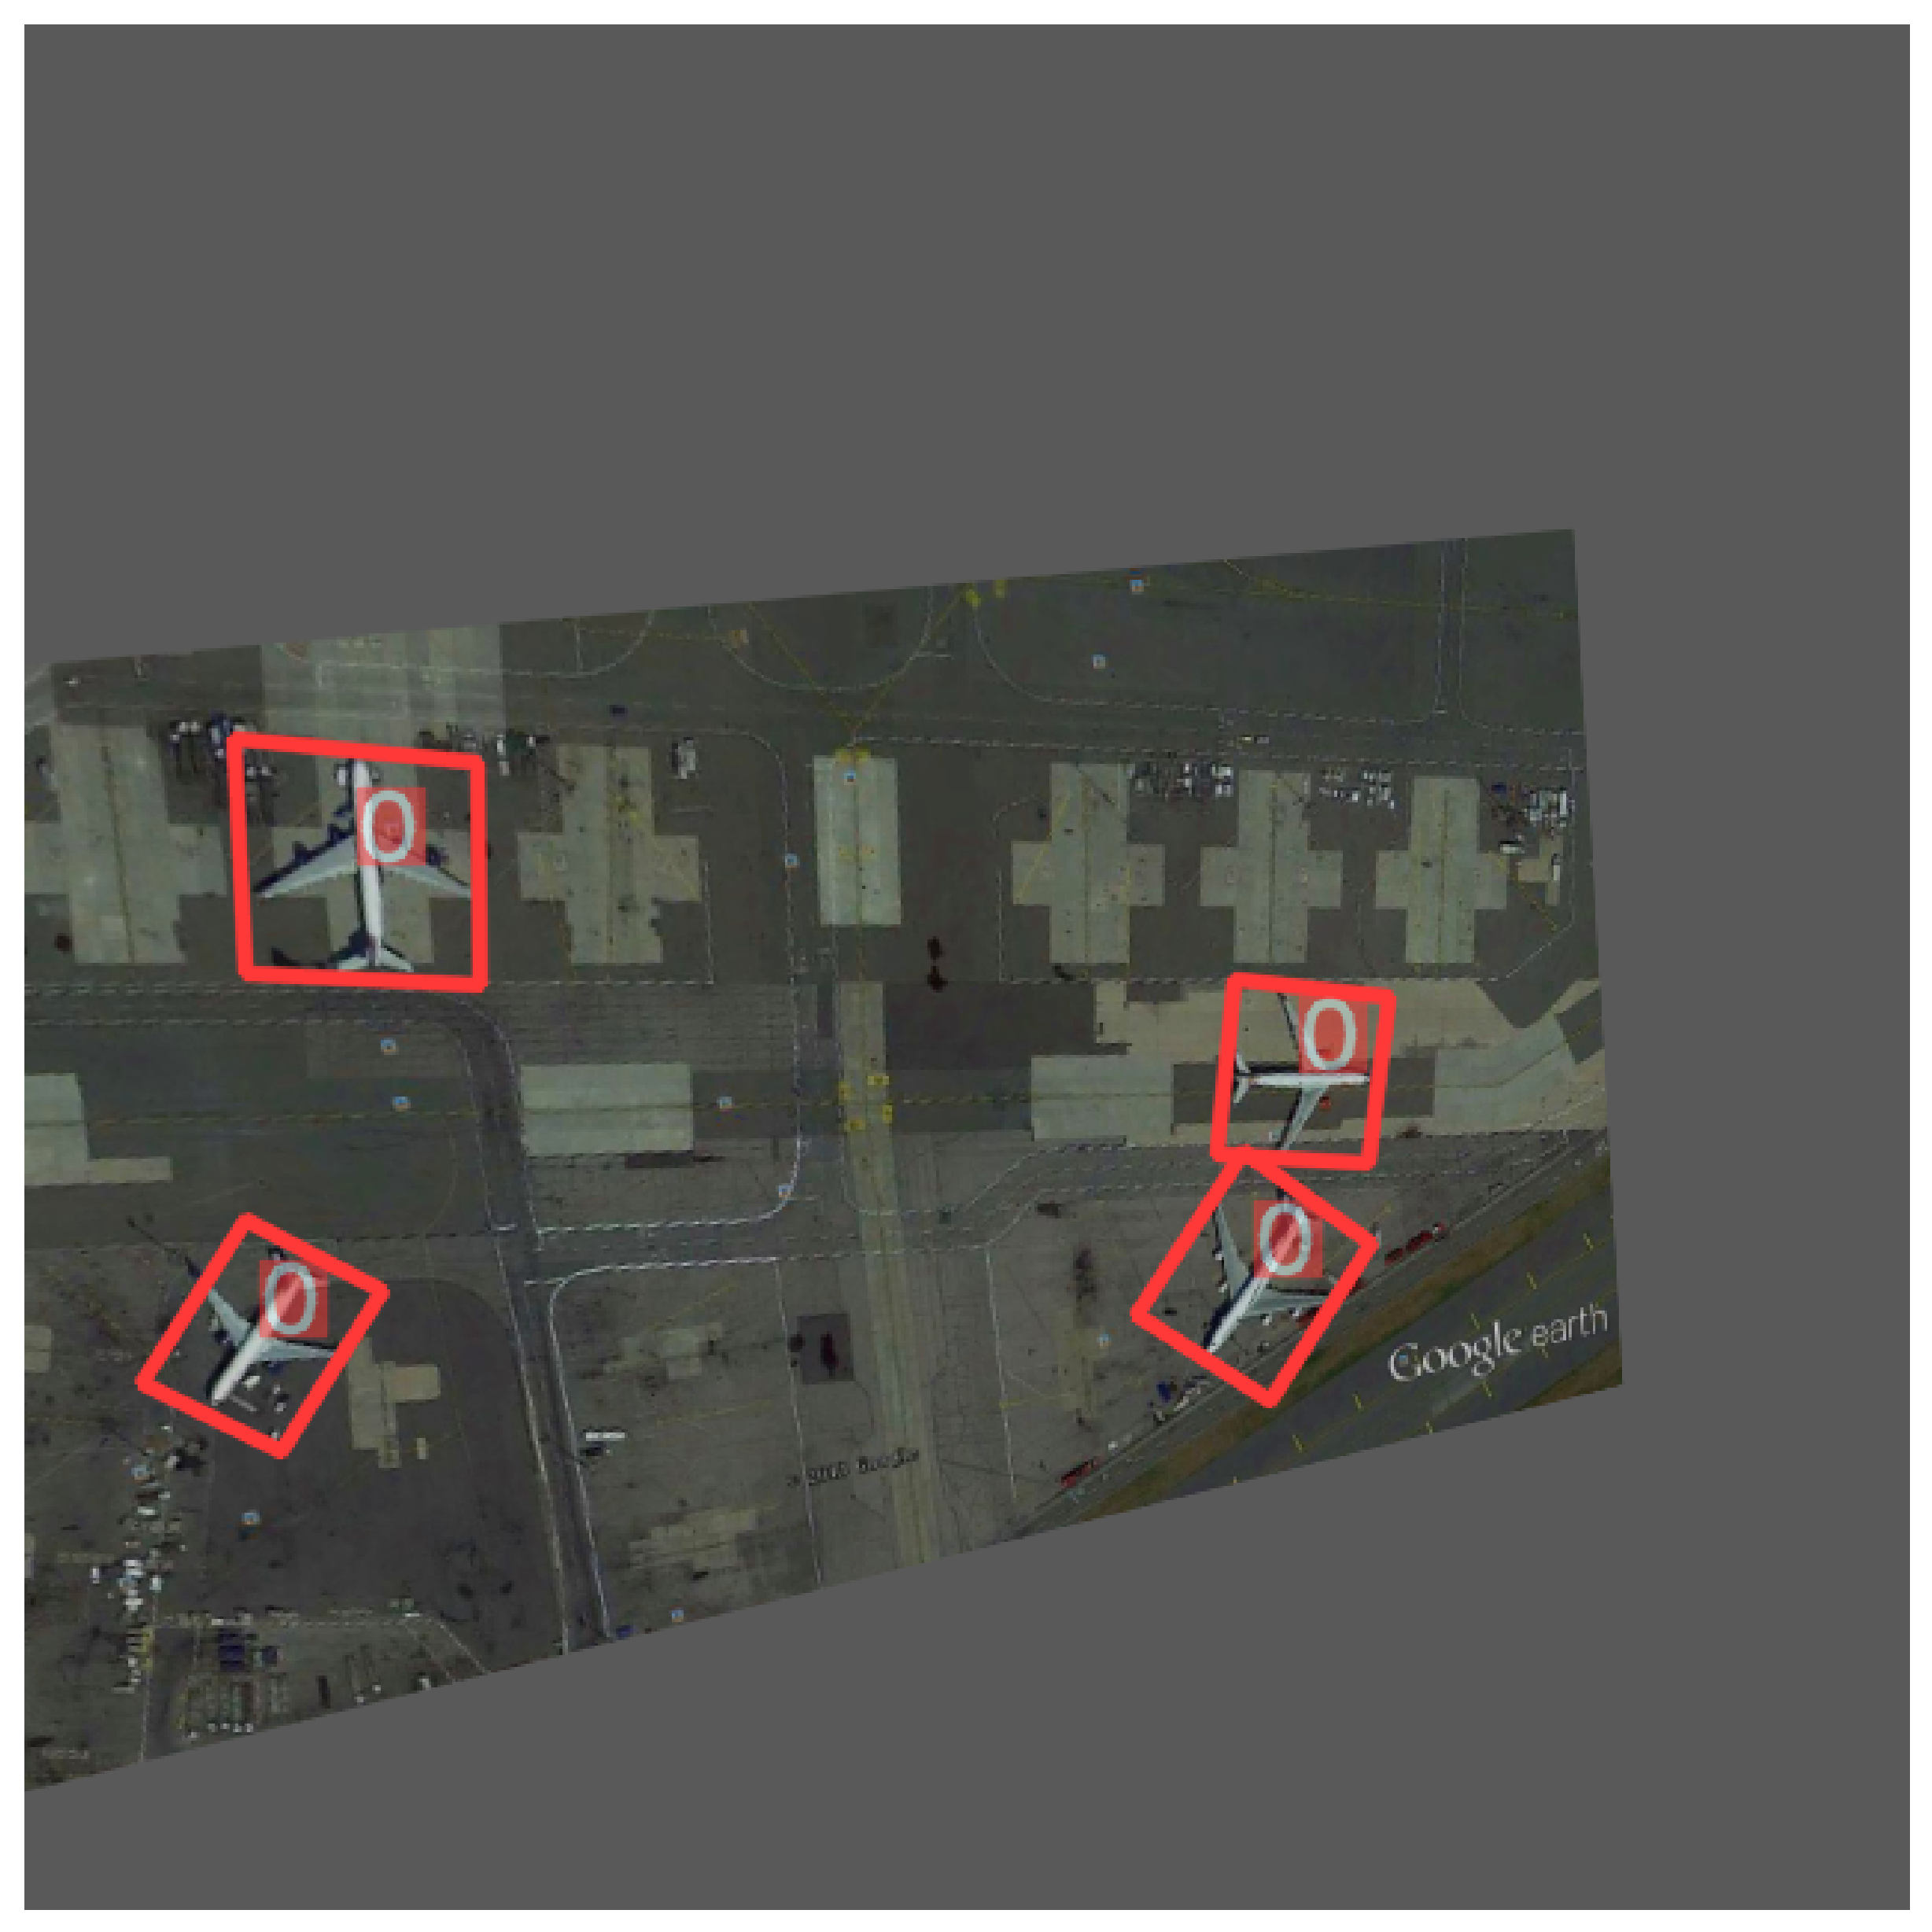

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import yaml
from utils.datasets import create_dataloader
from utils.plots import polygon_plot_images

%matplotlib inline
    
path = "../UCAS/images/train"
hyp_dir = "data/hyp.ucas.yaml"
imgsz = 640
batch_size = 1
stride = 32
pad = 0

with open(hyp_dir) as f:
    hyp = yaml.safe_load(f)  # load hyps
# hyp['mixup'] = 1.0    # Modify hyperparameters
# hyp['mosaic'] = 1.0    # Modify hyperparameters
print(hyp)

dataloader, dataset = create_dataloader(path, imgsz, batch_size, int(stride), True,
                                       hyp=hyp, cache=False, rect=False, rank=-1,
                                       world_size=1, augment=True,
                                       pad=pad, workers=0, polygon=True)


imgs, tgts, *_ = next(iter(dataloader))

plt.figure(figsize=(24, 16), dpi=200)
plt.imshow(polygon_plot_images(imgs, tgts))
plt.axis('off')

In [5]:
# Train polygon-YOLOv5s on UCAS-AOD train for 3 epochs
!python polygon_train.py --weights polygon-yolov5s-ucas.pt --cfg polygon_yolov5s_ucas.yaml \
    --data polygon_ucas.yaml --hyp hyp.ucas.yaml --img-size 1024 \
    --epochs 3 --batch-size 12 --noautoanchor --polygon --cache

YOLOv5 🚀 v5.0-174-g4695ca8 torch 1.9.0+cu102 CUDA:0 (NVIDIA Tesla K80, 11441.1875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=12, bbox_interval=-1, bucket='', cache_images=True, cfg='./models/polygon_yolov5s_ucas.yaml', data='./data/polygon_ucas.yaml', device='', entity=None, epochs=3, evolve=False, exist_ok=False, global_rank=-1, hyp='./data/hyp.ucas.yaml', image_weights=False, img_size=[1024, 1024], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=True, nosave=False, notest=False, polygon=True, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp5', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=12, upload_dataset=False, weights='polygon-yolov5s-ucas.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_mom

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          9         69      0.849      0.984      0.925      0.469
               plane          9         61      0.899      0.967       0.91      0.591
                 car          9          8      0.799          1       0.94      0.348
3 epochs completed in 0.020 hours.

Optimizer stripped from runs/train/exp5/weights/polygon_last.pt, 14.5MB
Optimizer stripped from runs/train/exp5/weights/polygon_best.pt, 14.5MB
Images sizes do not match. This will causes images to be display incorrectly in the UI.

wandb: Waiting for W&B process to finish, PID 3402
wandb: Program ended successfully.
wandb:                                                                                
wandb: Find user logs for this run at: /home/xinzeli831/PolygonObjectDetection/polygon-yolov5/wandb/run-20210709_024643-34c3d6ua/logs/debug.log
wandb: Find internal logs for this run at: /home/xinzeli831/PolygonObjec

## Local Logging

All results are logged by default to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc. View train and test jpgs to see labels, predictions and augmentation effects. If want to use mosaic effects in **DataLoader**, please modify data/hyp.ucas.yaml or related files

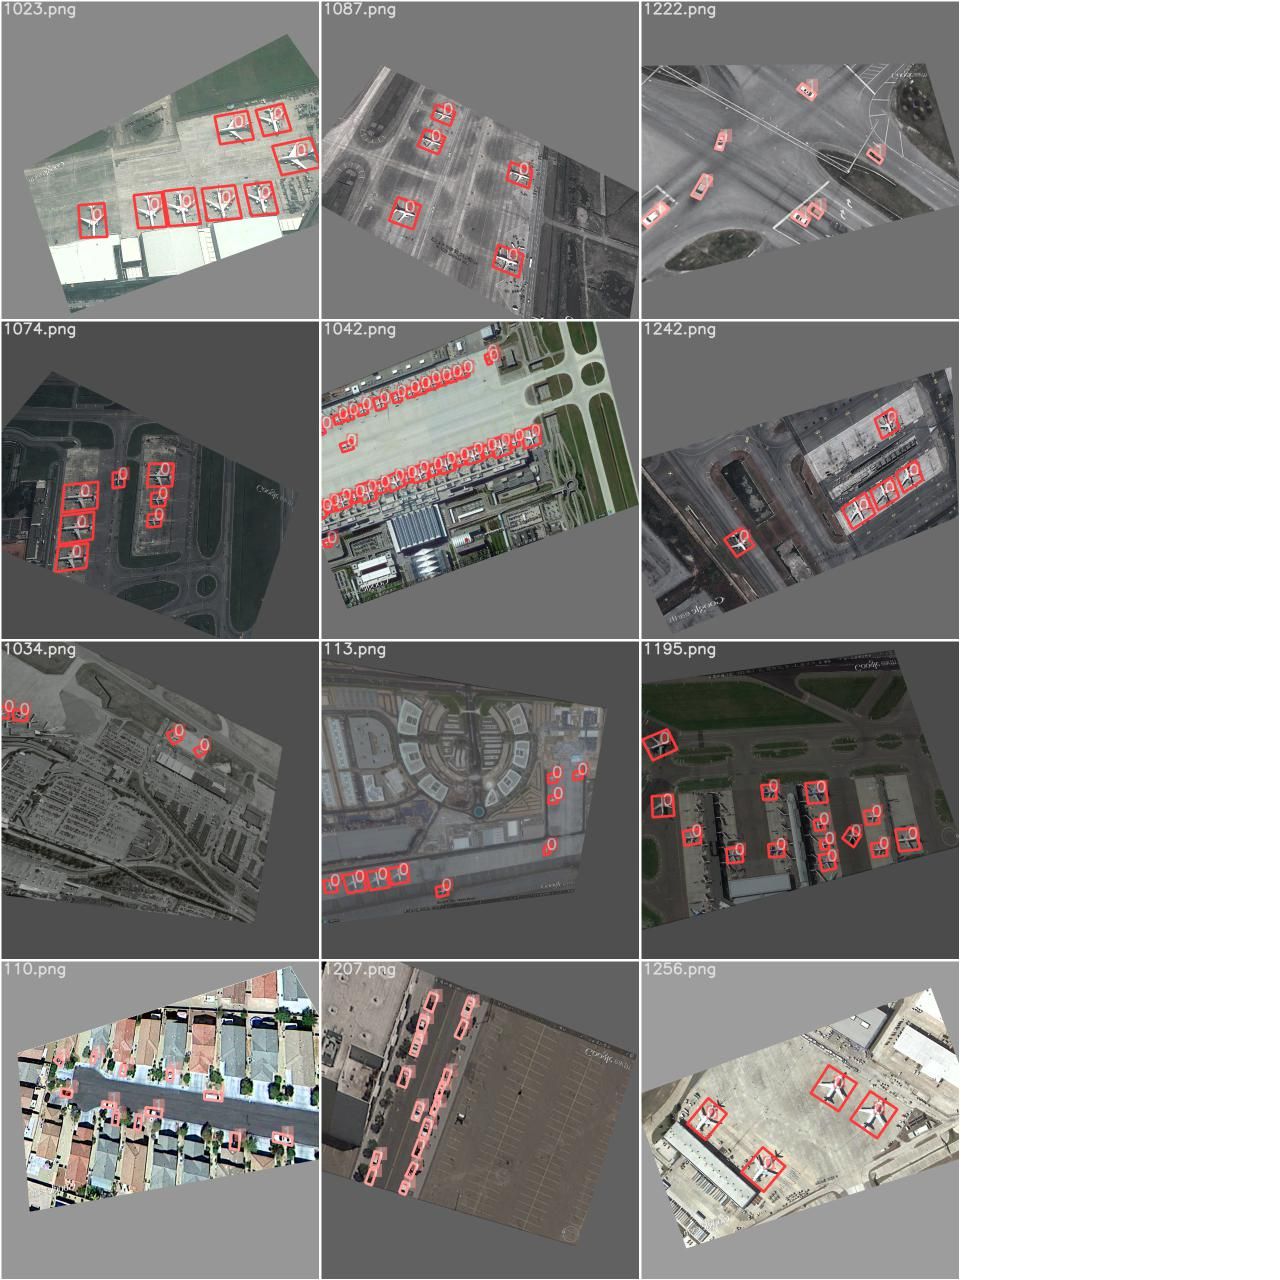

In [6]:
from IPython.display import Image

Image(filename='runs/train/exp/train_batch0.jpg', width=800)  # train batch 0 labels
# Image(filename='runs/train/exp/train_batch1.jpg', width=800)  # train batch 1 labels
# Image(filename='runs/train/exp/train_batch2.jpg', width=800)  # train batch 2 labels

Training losses and performance metrics are also logged to [Tensorboard](https://www.tensorflow.org/tensorboard) and a custom `results.txt` logfile which is plotted as `results.png` (below) after training completes. Here we show YOLOv5s trained on COCO128 to 300 epochs, starting from scratch (blue), and from pretrained `--weights yolov5s.pt` (orange).

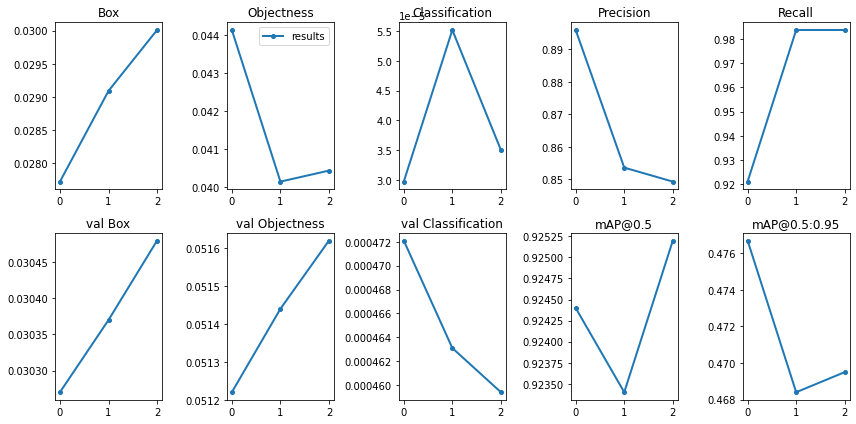

In [9]:
from IPython.display import Image, display

from utils.plots import plot_results
# notest=True in training, so val losses are not available in the following figures
plot_results(save_dir='runs/train/exp')  # plot all results*.txt as results.png

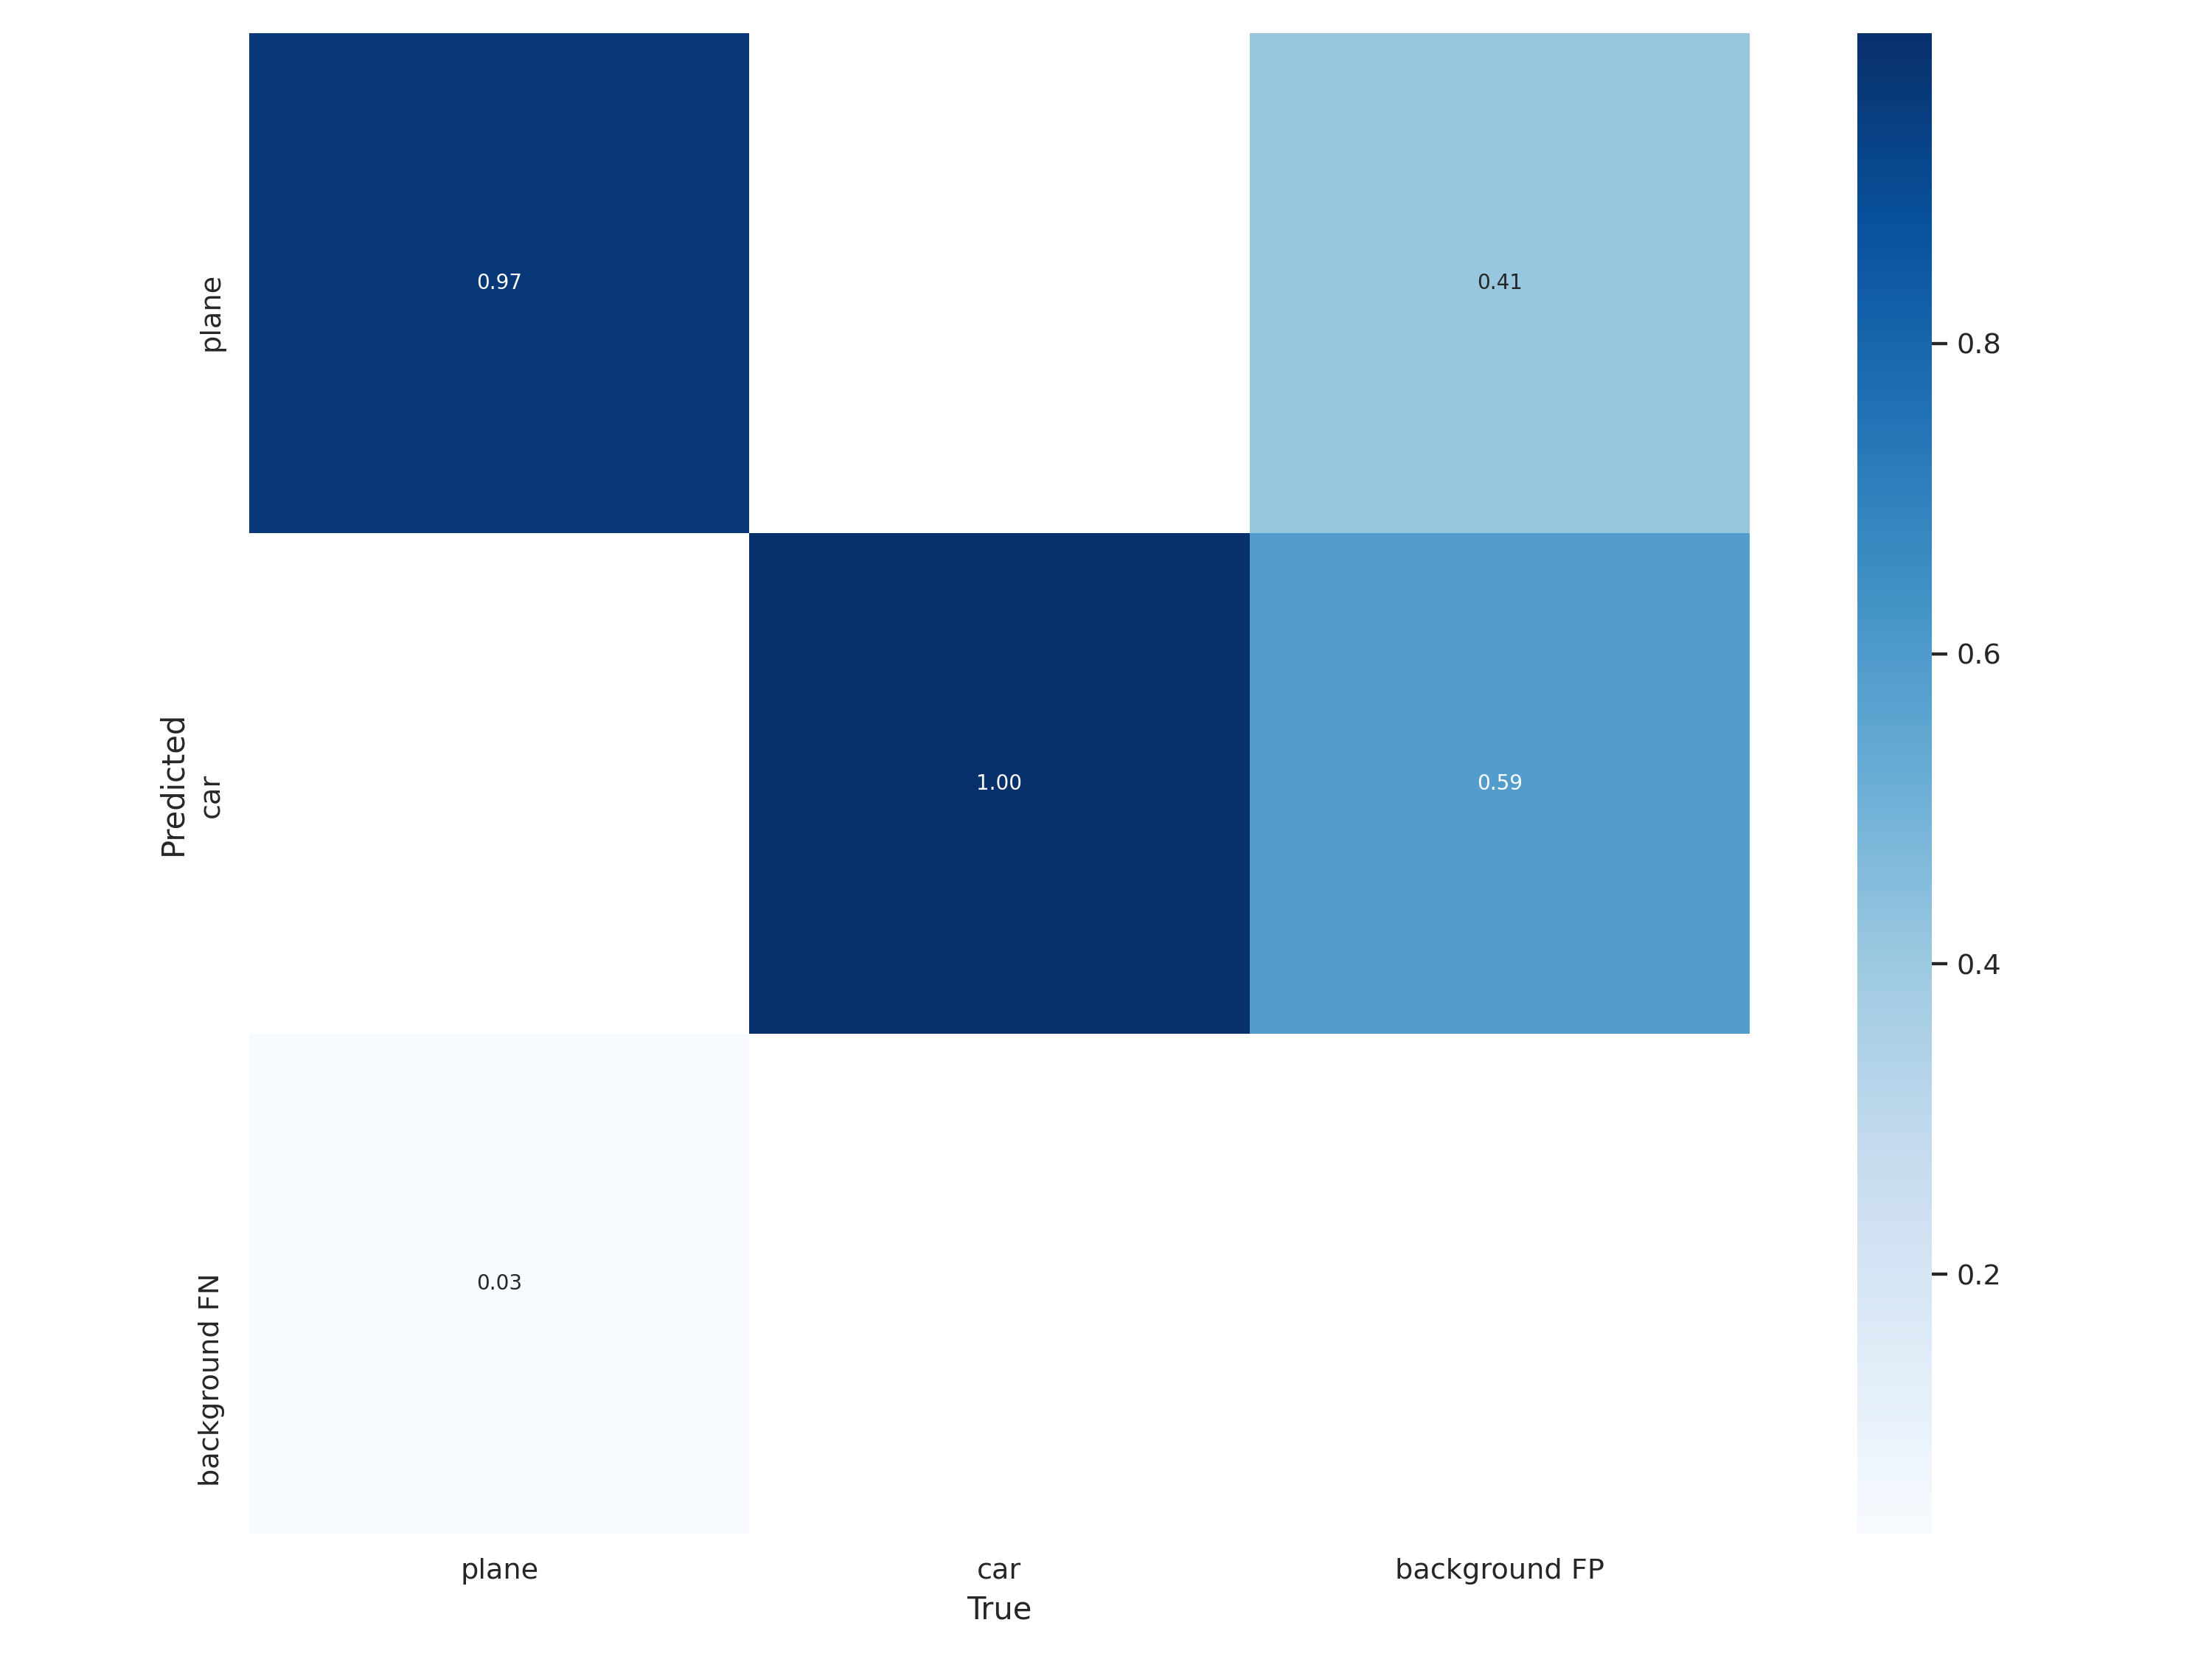

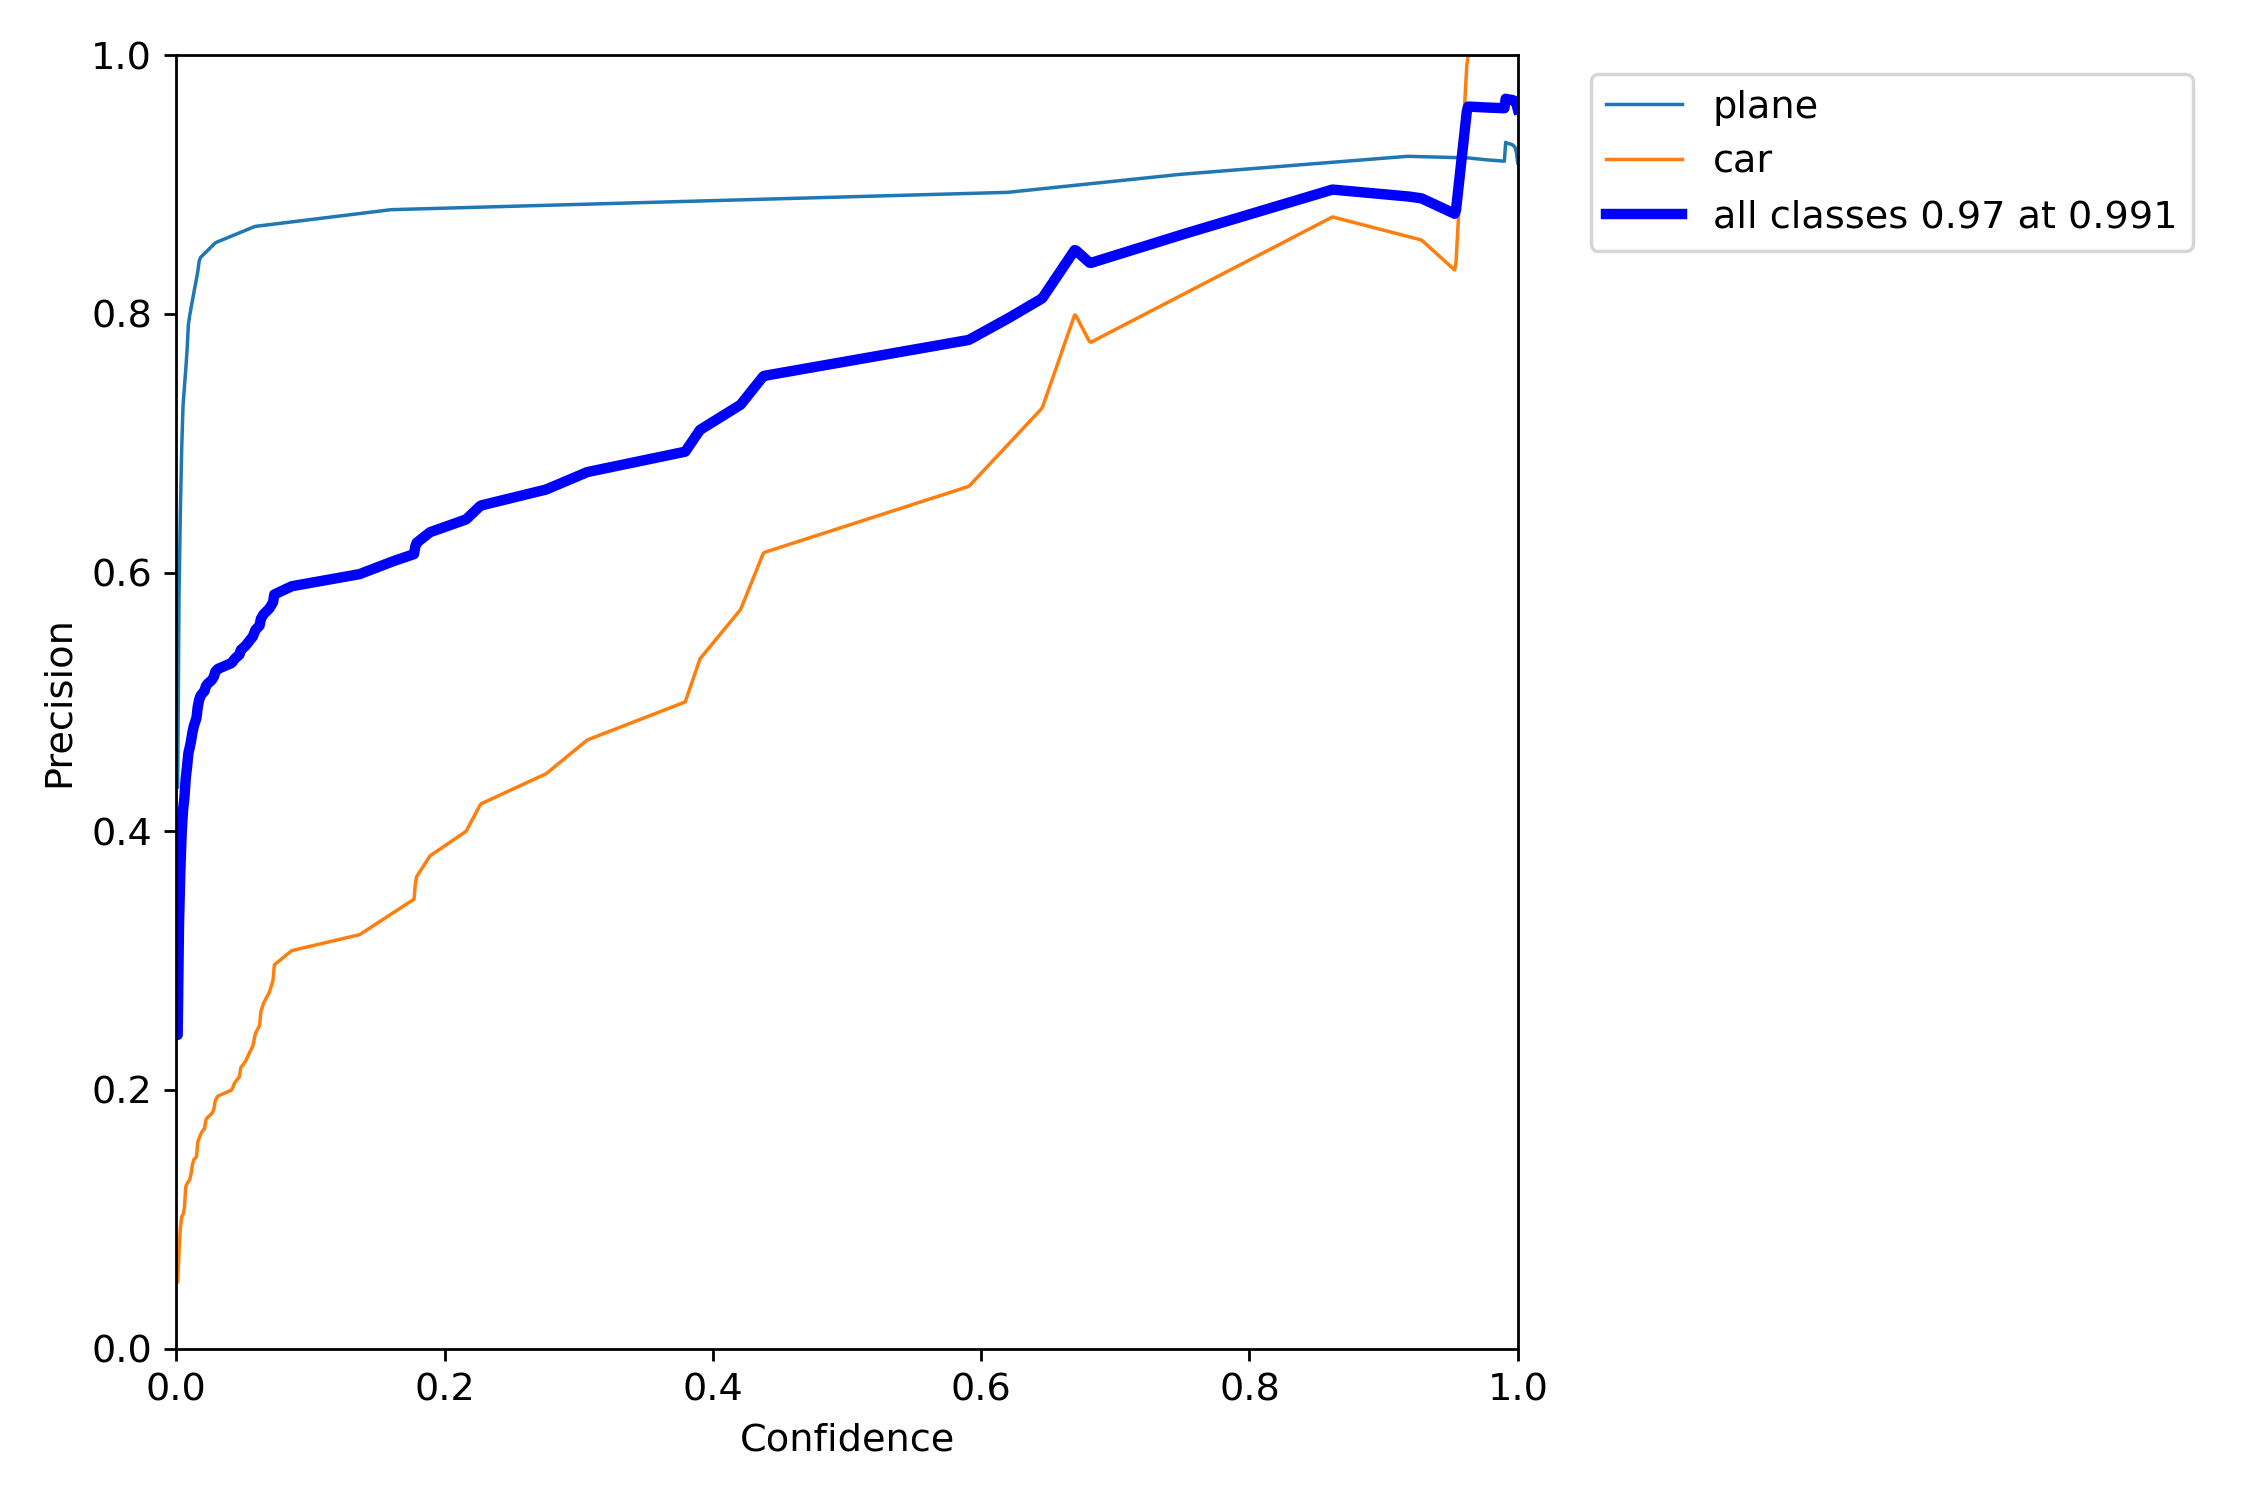

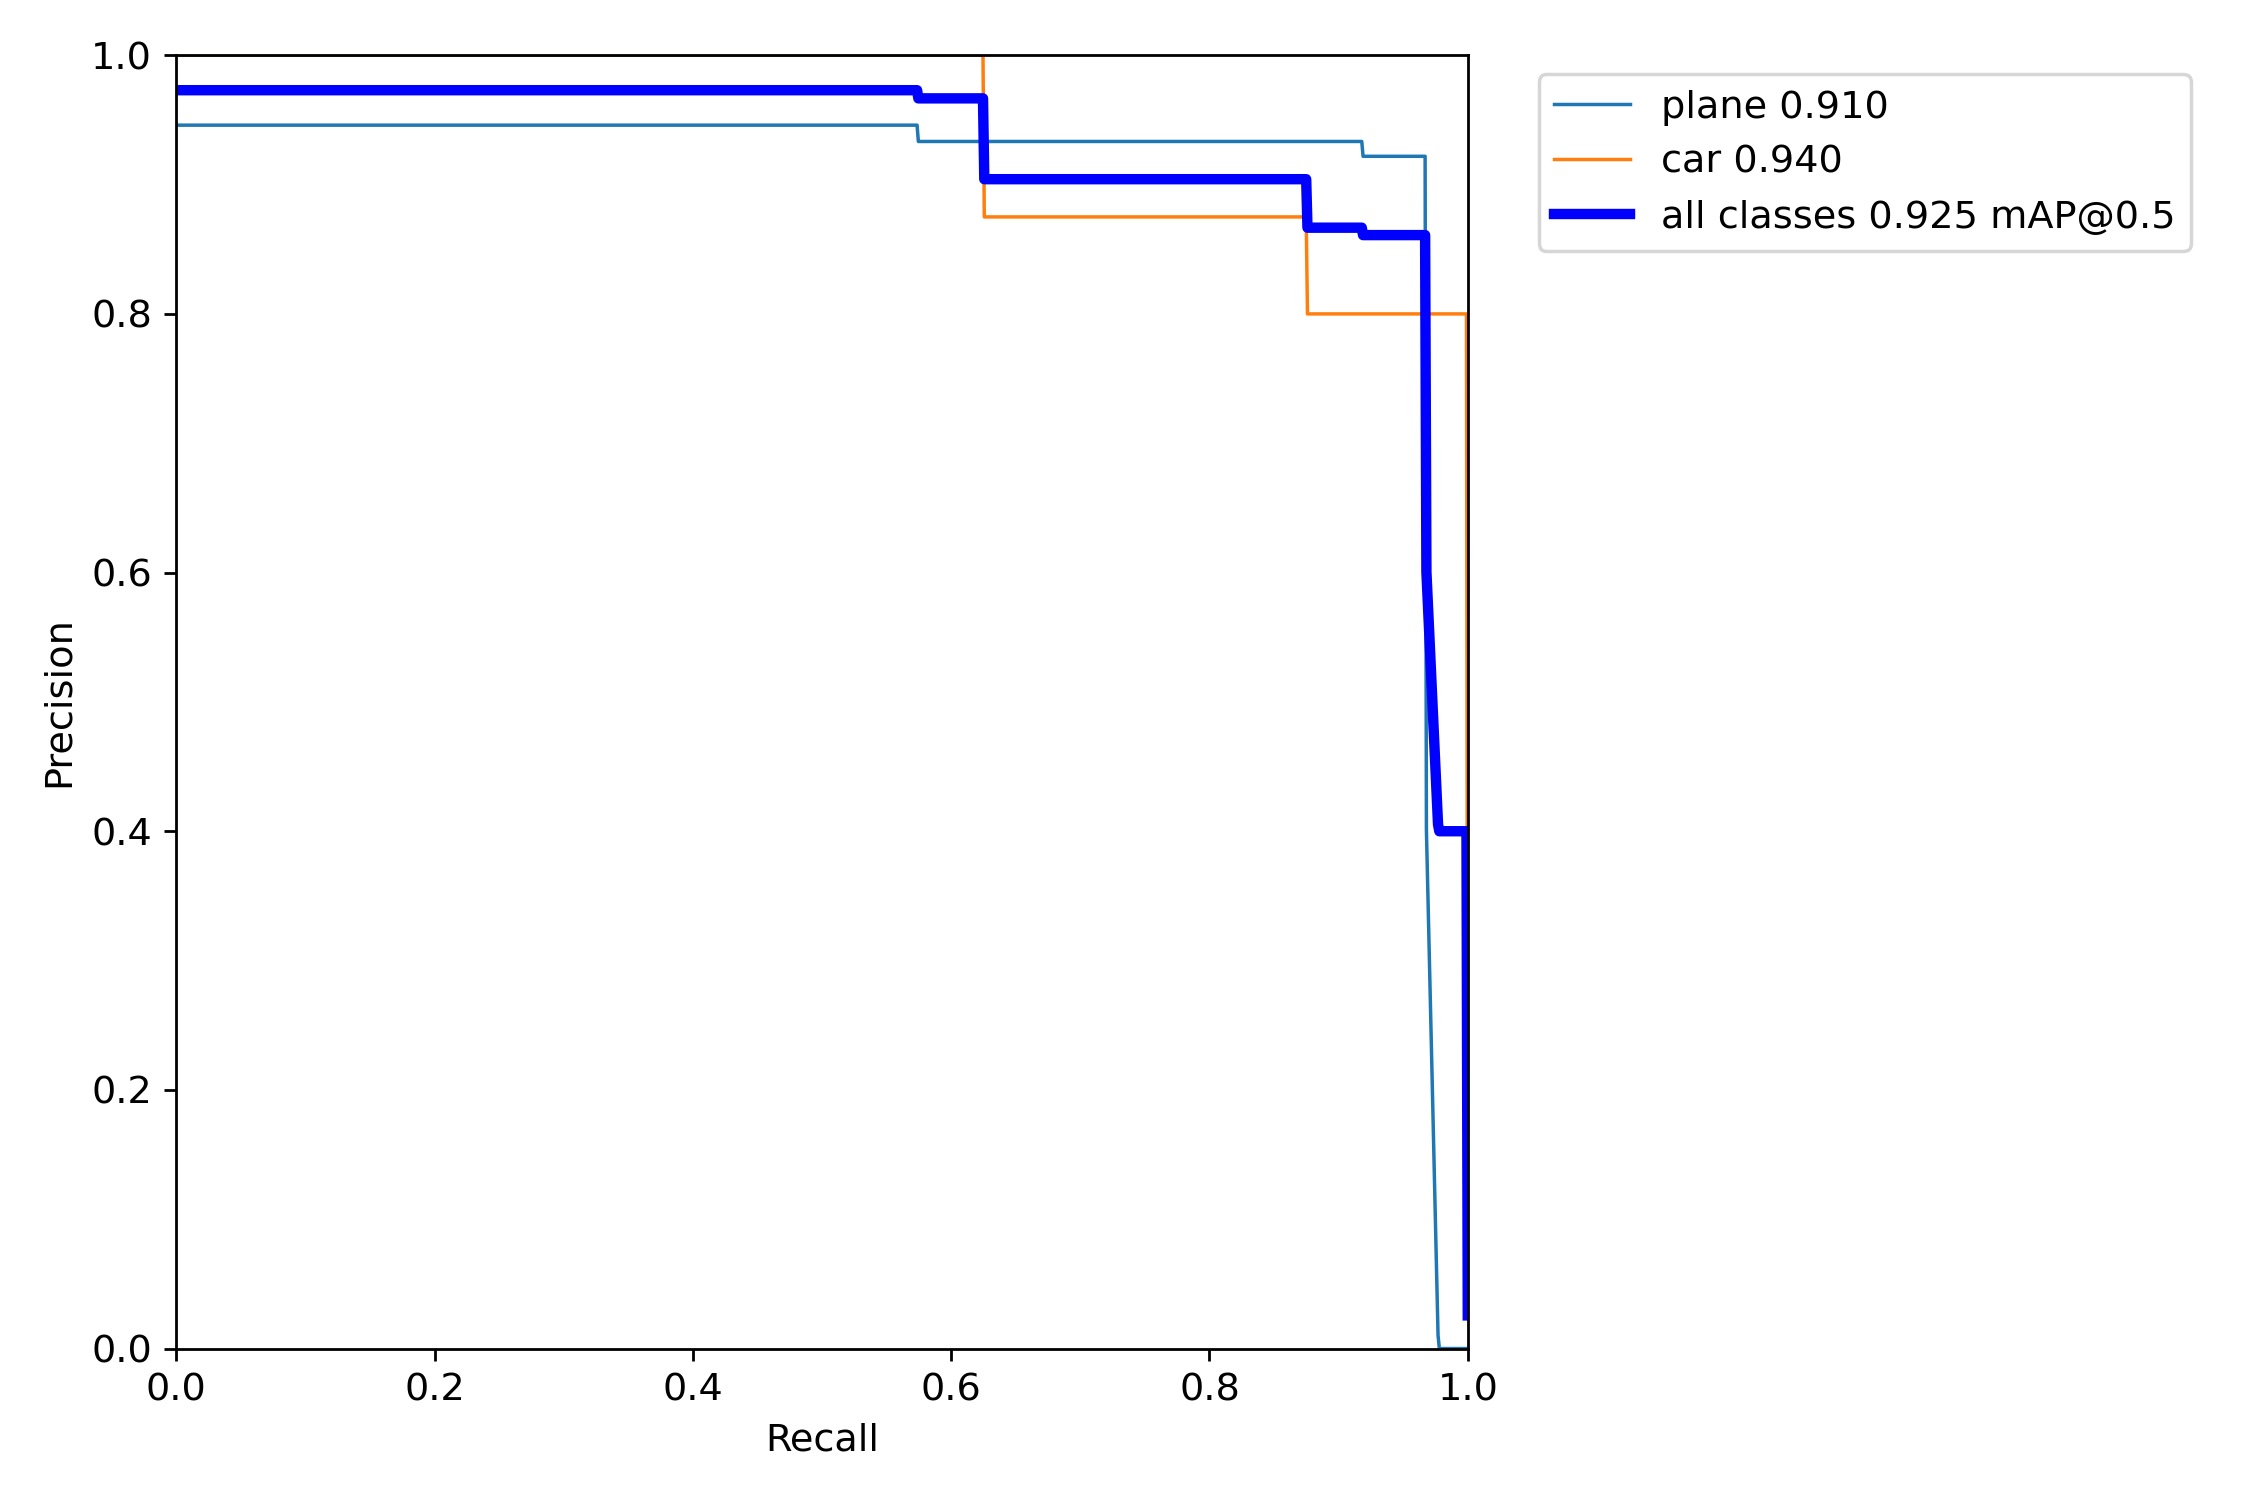

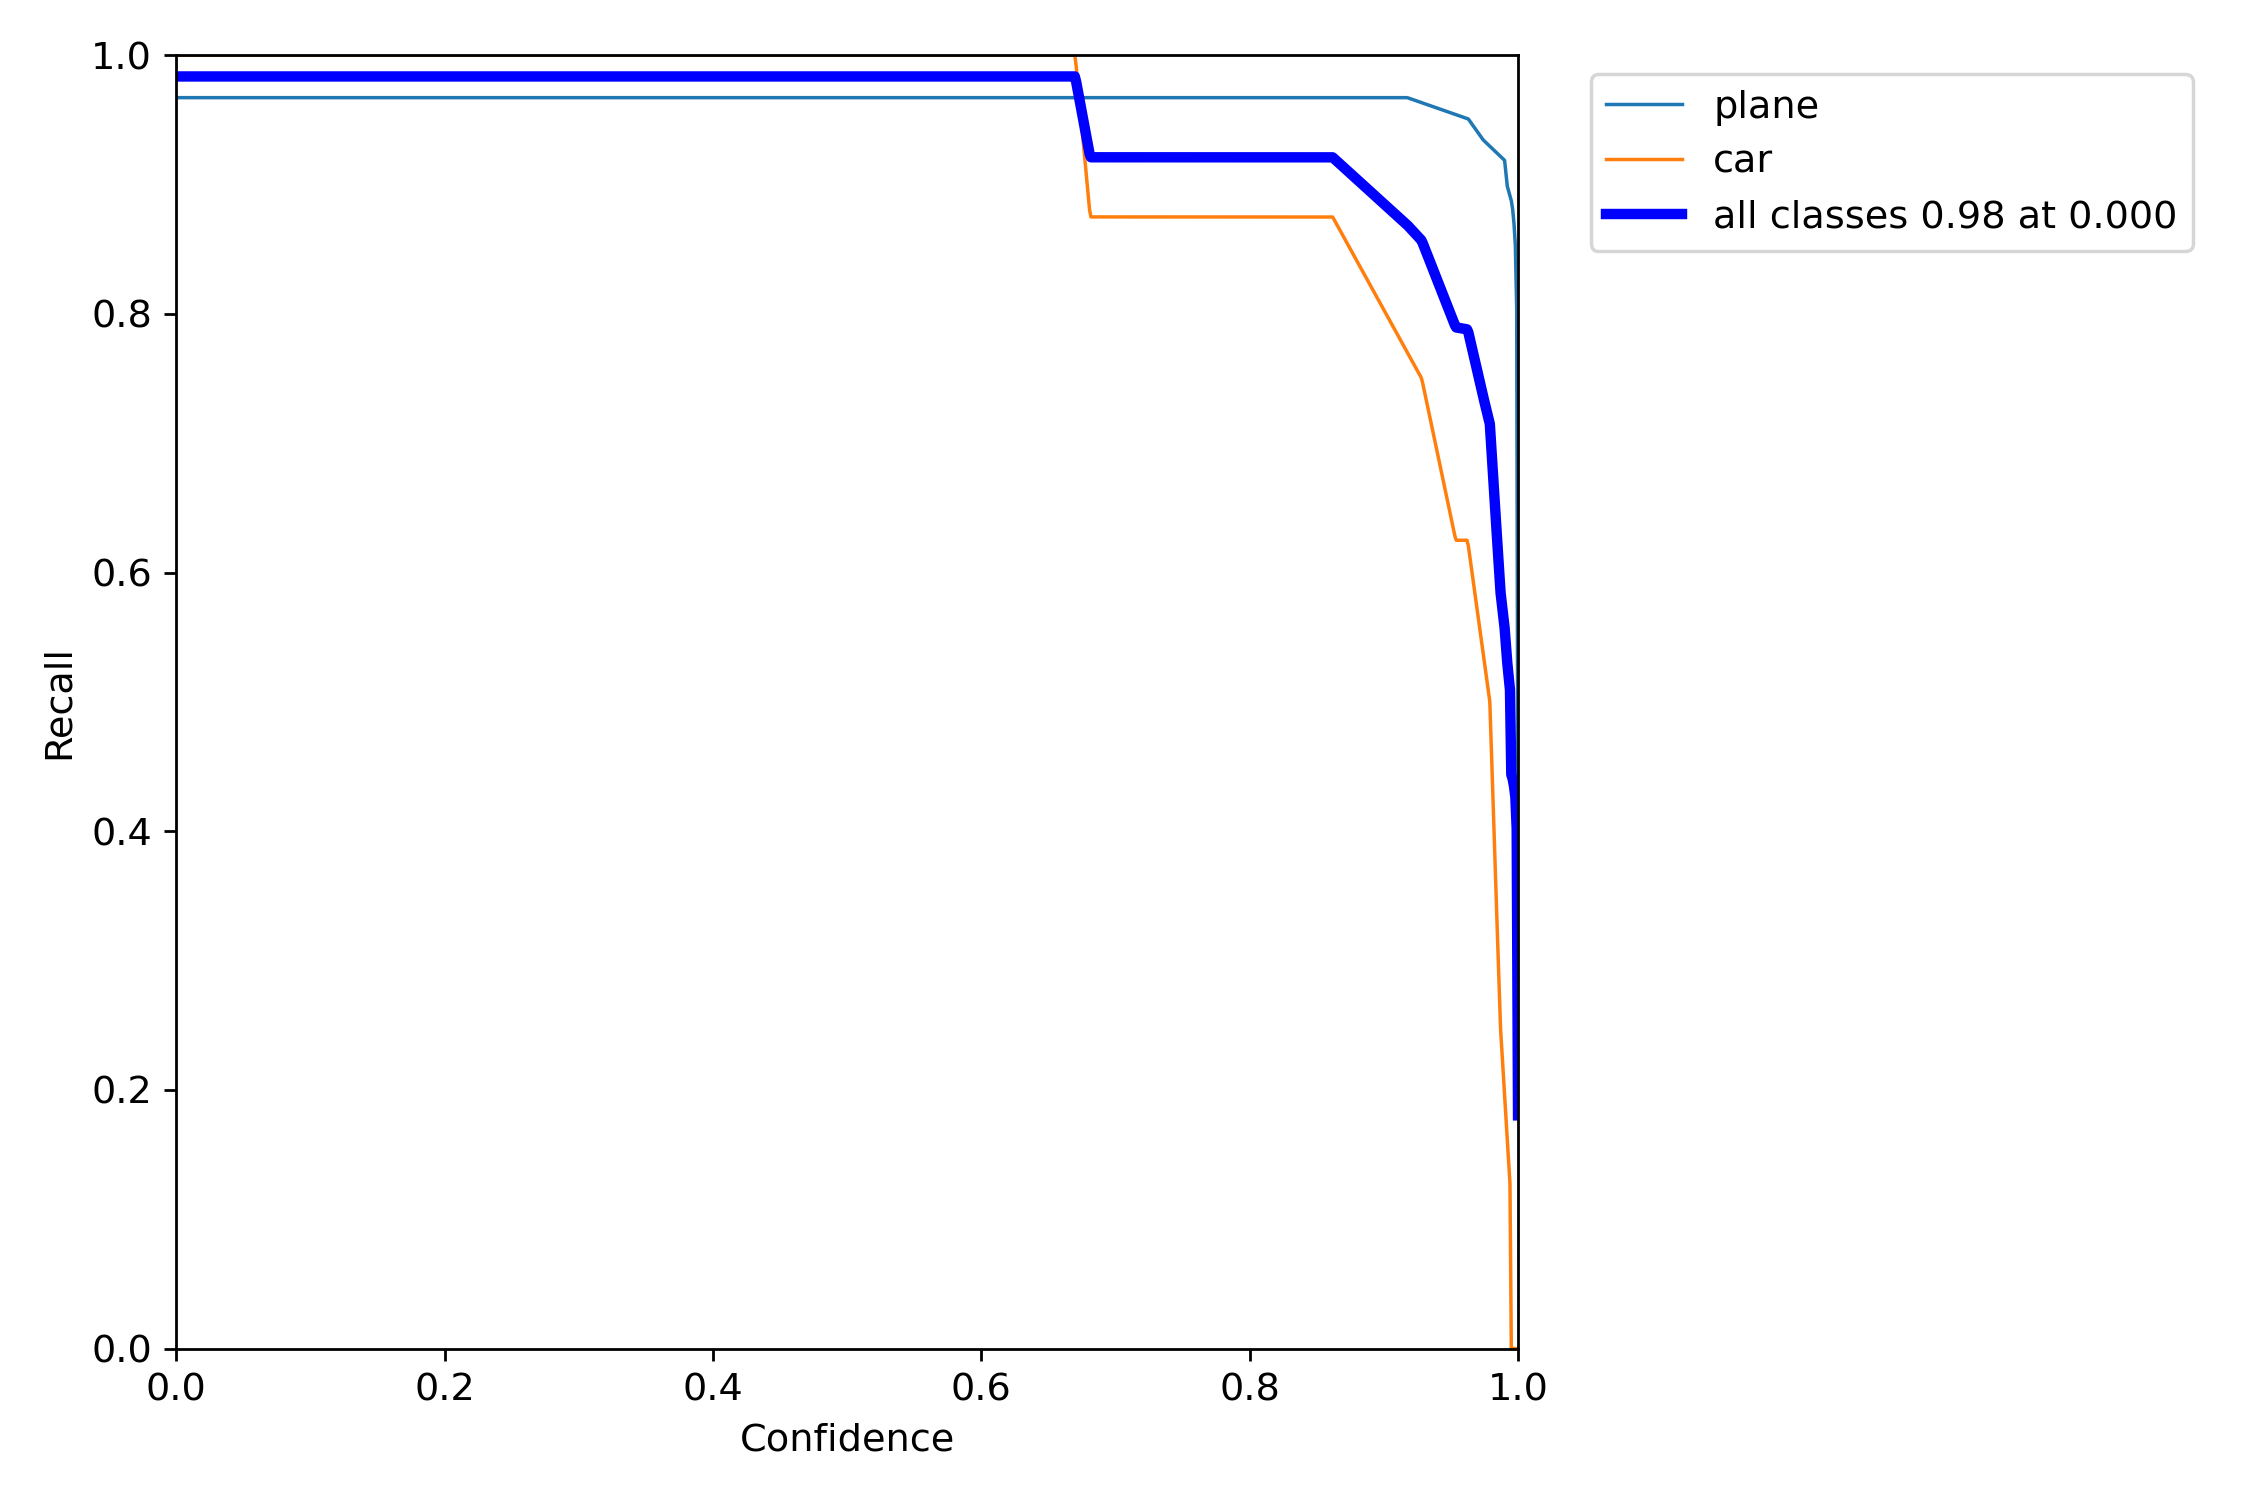

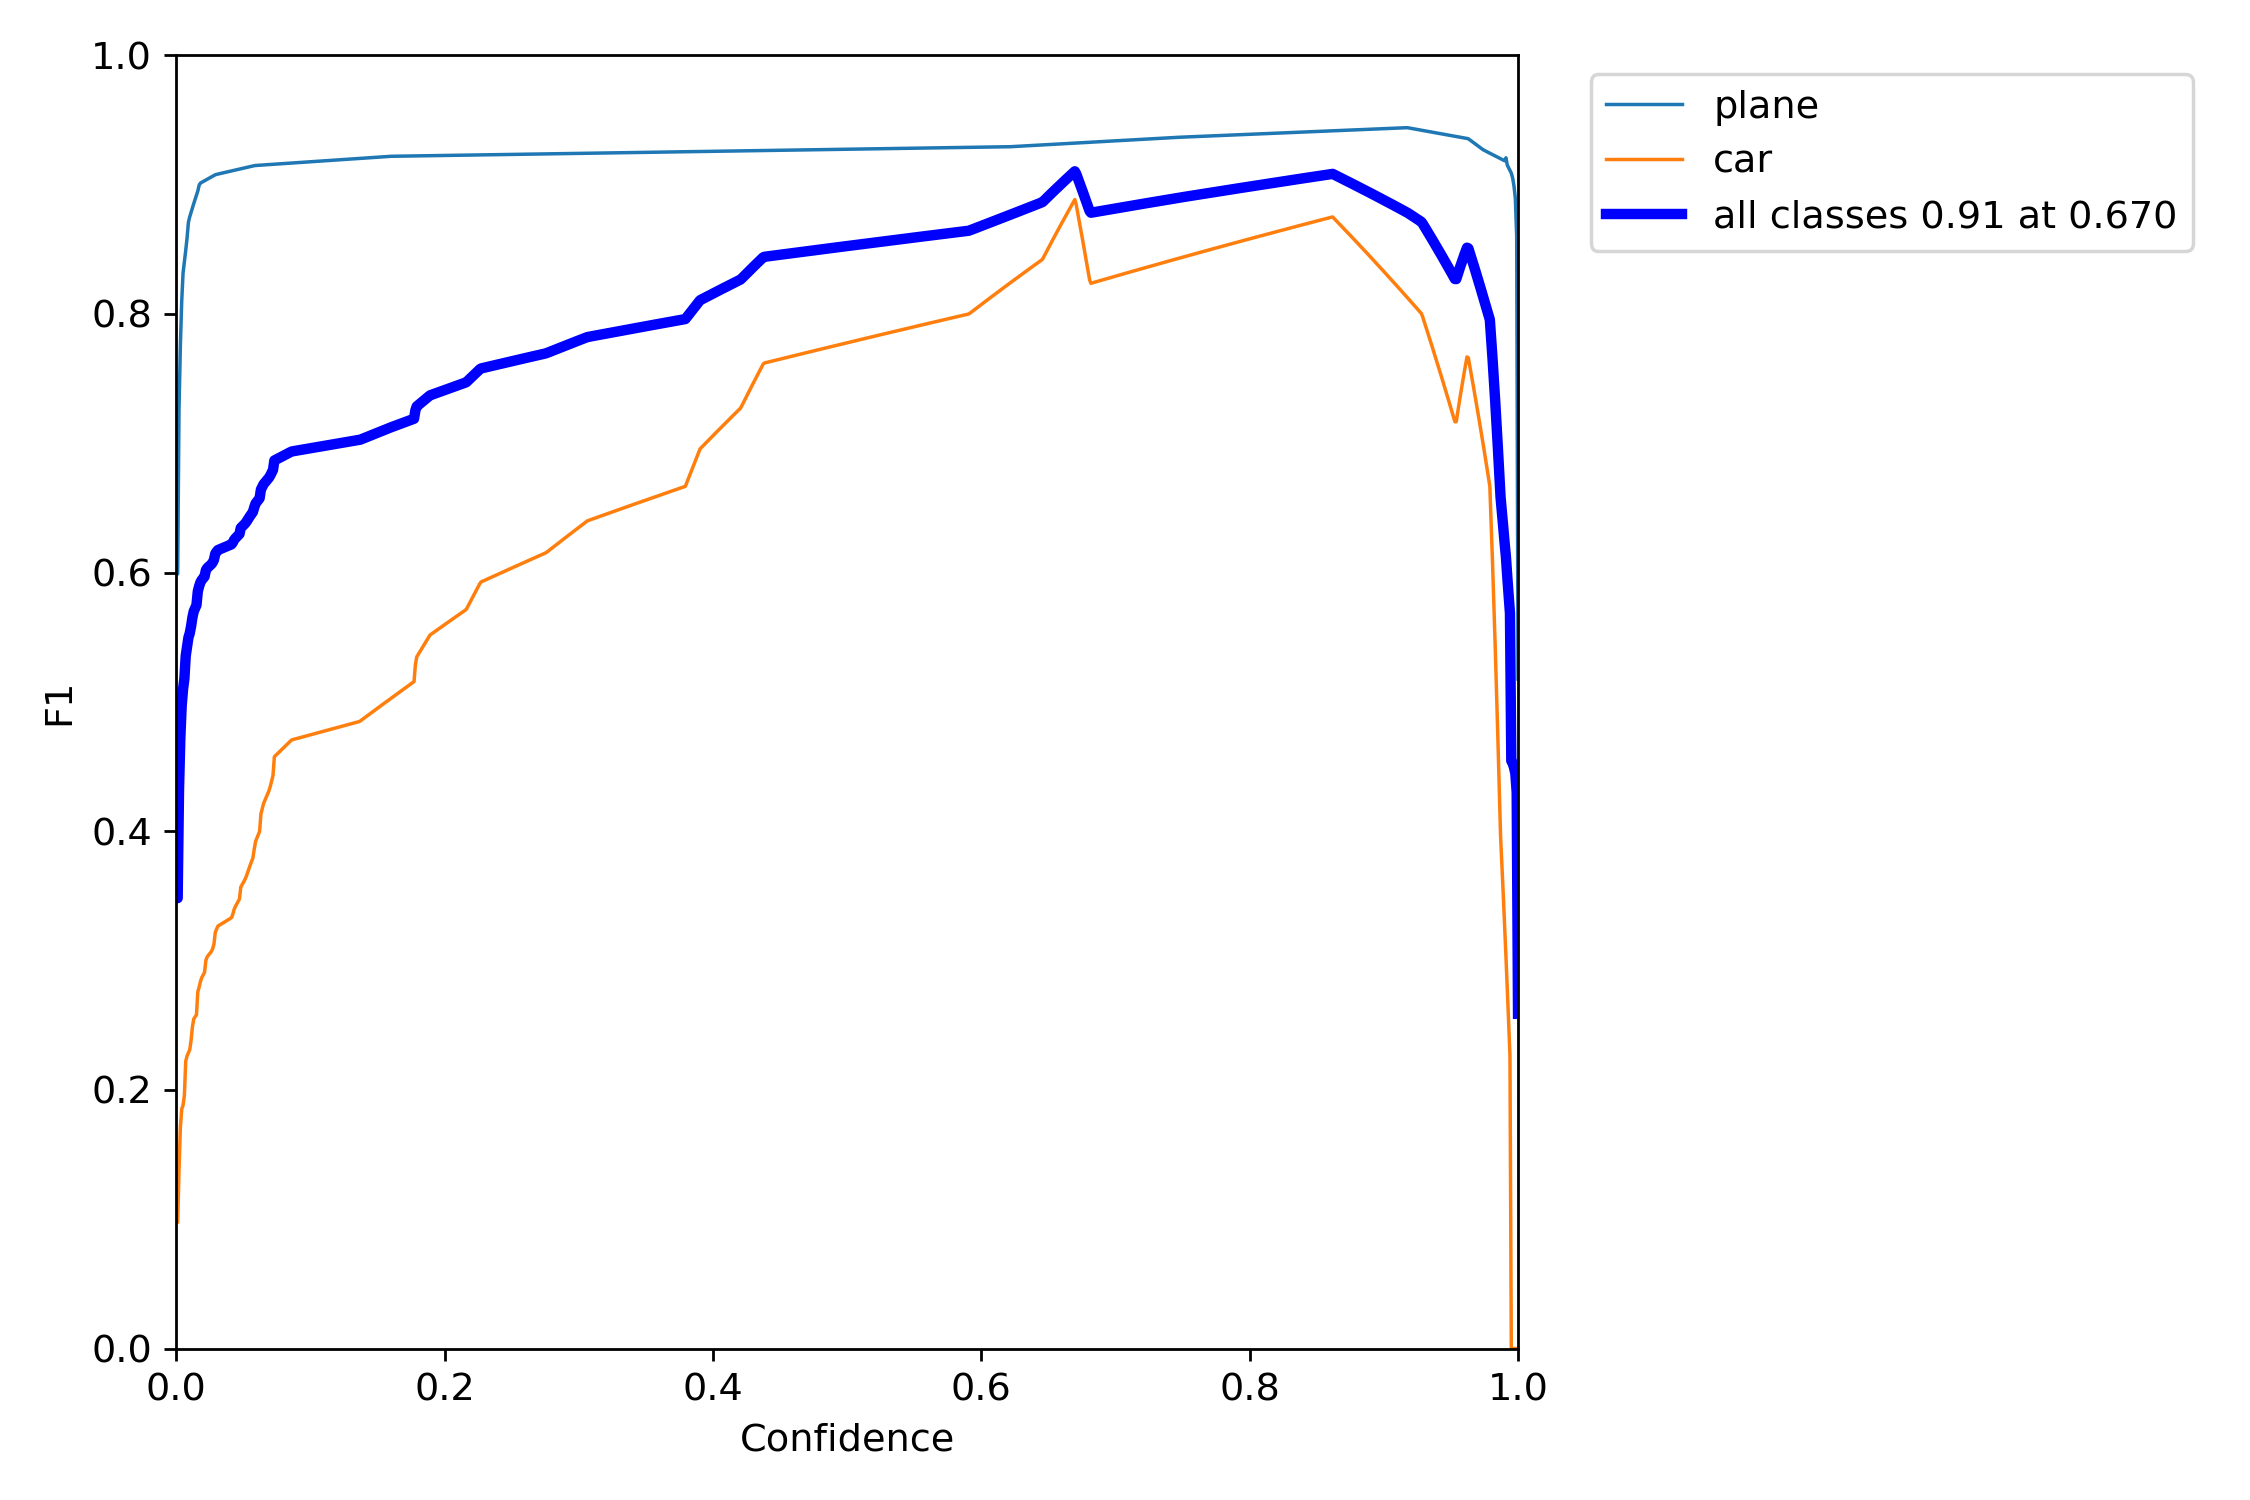

In [10]:
from pathlib import Path
from IPython.display import Image, display

result_dir = Path('runs/train/exp')

files = ['confusion_matrix.png', 'P_curve.png', 'PR_curve.png', 'R_curve.png', 'F1_curve.png']

for file in files:
    display(Image(filename=str(result_dir/file), width=800))